<a href="https://colab.research.google.com/github/shaluduggal/shaluduggal/blob/machinelearning/optimalcutoffpointusing_roc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("c:\dataset\diabetes.csv")
df
X=df.iloc[:,:8]
y=df['Outcome']
X=StandardScaler().fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

0    0.651042
1    0.348958
Name: Outcome, dtype: float64


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

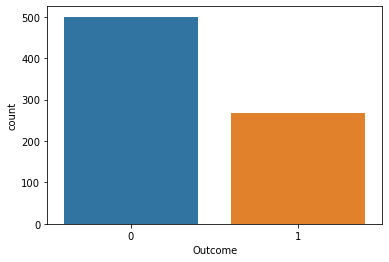

In [ ]:
print(df['Outcome'].value_counts(normalize=True))
sns.countplot(df['Outcome'])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
model=LogisticRegression()
model=model.fit(x_train,y_train)
#with prob > .5 or <0.5 as 1  0


In [ ]:
y_pred=model.predict(x_train)
#generate class probabilities 2 array in prob ist ele. for neg class , iind ele. for pos. class
probs=model.predict_proba(x_train)
y_pred_prob=probs[:,1]
y_pred_prob
print('accuracy:',metrics.accuracy_score(y_train,y_pred))

accuracy: 0.7635009310986964


In [ ]:
#find optimal cutoff point
fpr,tpr,thresholds=metrics.roc_curve(y_train,y_pred_prob)
roc_auc=metrics.auc(fpr,tpr)
print('area under cover %f'%roc_auc)


area under cover 0.837907


In [ ]:
i=np.arange(len(tpr))
roc=pd.DataFrame({'fpr':pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i),'1-fpr':pd.Series(1-fpr,index=i),'tf':pd.Series(tpr-(1-fpr),index=i),'thresholds':pd.Series(thresholds,index=i)})
roc[[thresolds]]

,fpr,tpr,1-fpr,tf,thresholds
0,0.000000,0.000000,1.000000,-1.000000,1.991127
1,0.000000,0.005155,1.000000,-0.994845,0.991127
2,0.000000,0.025773,1.000000,-0.974227,0.948860
3,0.002915,0.025773,0.997085,-0.971311,0.941172
4,0.002915,0.030928,0.997085,-0.966157,0.940538
...,...,...,...,...,...
167,0.953353,0.989691,0.046647,0.943043,0.032722
168,0.953353,0.994845,0.046647,0.948198,0.029849
169,0.976676,0.994845,0.023324,0.971522,0.019290
170,0.976676,1.000000,0.023324,0.976676,0.018604


In [ ]:
roc.iloc[(roc.tf-0).abs().argsort()[:1]]


,fpr,tpr,1-fpr,tf,thresholds
98,0.244898,0.757732,0.755102,0.00263,0.339194


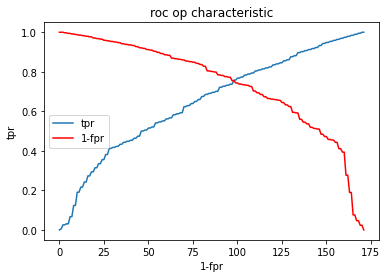

In [ ]:
fig,ax=plt.subplots()
plt.plot(roc['tpr'],label='tpr')
plt.plot(roc['1-fpr'],color='red',label='1-fpr')
plt.legend(loc='best')
plt.xlabel('1-fpr')
plt.ylabel('tpr')
plt.title('roc op characteristic')
plt.show()

In [ ]:
def find_optimal_cutoff(target,predicted):
    fpr,tpr,threshold=metrics.roc_curve(target,predicted)
    i=np.arange(len(tpr))
    roc=pd.DataFrame({'tf':pd.Series(tpr-(1-fpr),index=i),'thresholds':pd.Series(thresholds,index=i)})
    roc_t=roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    print(roc_t)
    return list(roc_t['thresholds'])

In [ ]:
threshold=find_optimal_cutoff(y_train,probs[:,1])
print('optimal prob threshold',threshold)
y_pred_optimal=np.where(y_pred_prob>=threshold,1,0)
print('normal accuracy',metrics.accuracy_score(y_train,y_pred))
print('optimal cutoff accuracy',metrics.accuracy_score(y_train,y_pred_optimal))
print('normal confusion mat',metrics.confusion_matrix(y_train,y_pred))
print('optimal cutoff confusion matrix',metrics.confusion_matrix(y_train,y_pred_optimal))

         tf  thresholds
98  0.00263    0.339194
optimal prob threshold [0.3391944773878643]
normal accuracy 0.7635009310986964
optimal cutoff accuracy 0.7560521415270018
normal confusion mat [[297  46]
 [ 81 113]]
optimal cutoff confusion matrix [[259  84]
 [ 47 147]]
